# Student Performance Indicator

### Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Exploratory Data Analysis
- Data Pre-processing
- Model Training
- Choose Best Model

### 1 - Problem Statement
- This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation Course.

### 2 - Data Collection
- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The data consists of 8 columns and 1000 rows.

#### 2.1 - Import Data and Required Packages

##### 2.1.1 - Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### 2.1.2 - Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

##### 2.1.3 - Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### 2.1.4 - Shape of Dataset

In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset Information

Category | Definition | Values
-|-|-|
Gender | Gender of students | Male/Female
Race/Ethnicity | Ethnicity of Students | Group A/B/C/D/E
Parental Level of Education | Parent's Highest Qualification | Bachelor's Degree/Master's Degree/Some College/Associate's Degree/High School
Lunch | Whether student had lunch before test | Standard or Free/Reduced
Test Preparation Course | Whether preparation done | Complete/Note Complete
Math Score || int
Reading Score || int
Writing Score || int

### 3 - Data Checks to Perform

1. Check Missing Values
2. Check Duplicates
3. Check Data Types
4. Check Number of Unique Values in each Column
5. Check Statistics of Dataset
6. Check type of Categories present

#### 3.1 - Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

#### 3.2 - Check Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicate values in the data set.

#### 3.3 - Check Data Types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 - Check Number of Unique Values in each Feature

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 - Check Statistics of Numerical Features in Dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.6 - Insight
1. Mean scores across Math, Reading and Writing are close.
2. Students on average are weakest in Math (Mean: 66.1), followed by Writing (Mean: 68.1) then Reading (Mean: 69.2).
3. There is at least 1 student that scored 0 in Math.
4. There is at least 1 student in each subject that scored full marks (100).
5. Standard Deviations are close.
6. Percentile scores across subjects are close, but Math scores across percentiles are still lower than the other subjects.

#### 3.7 - Exploring Data

In [13]:
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:     ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:     ", end=" ")
print(df['gender'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['female' 'male']


In [17]:
def feature_type(dataset):

    # define numerical & categorical columns
    # 'O' stands for 'Object'
    df = dataset
    numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
    categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

    #print columns
    print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
    print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

feature_type(df)

We have 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'total score', 'average']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 - Adding Columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
feature_type(df)

We have 5 numerical features : ['math_score', 'reading_score', 'writing_score', 'total score', 'average']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [21]:
# df[['total score', 'average']].describe()
df.describe()

,math_score,reading_score,writing_score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [27]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Math: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [31]:
reading_less_20 = df[df['reading_score'] < 20]['average'].count()
writing_less_20 = df[df['writing_score'] < 20]['average'].count()
math_less_20 = df[df['math_score'] < 20]['average'].count()
math_is_0 = df[df['math_score'] == 0]['average'].count()

print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Math: {math_less_20}')
print(f'Number of students that scored 0 in Math: {math_is_0}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Math: 4
Number of students that scored 0 in Math: 1


### 3.9 - Insights

1. Students performed the worst in Maths, performed the best in Reading
2. There are multiple students that scored full marks in each subject.
3. The number of students scoring lower than 20 marks are in the single digits in each subject.

### 4 - Exploraing Data (Visualization)

#### 4.1 - Visualize average score distribution to make some inferences.

- Histogram
- Kernel Distribution Function (KDE)

##### 4.1.1 - Histogram & KDE

<function matplotlib.pyplot.show(close=None, block=None)>

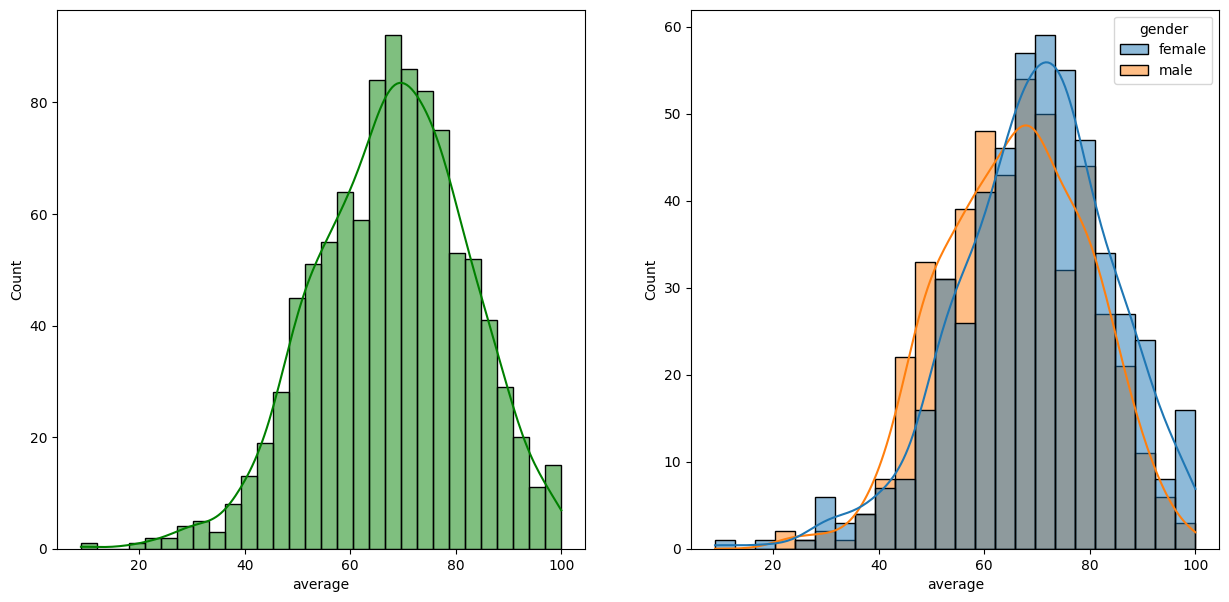

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show

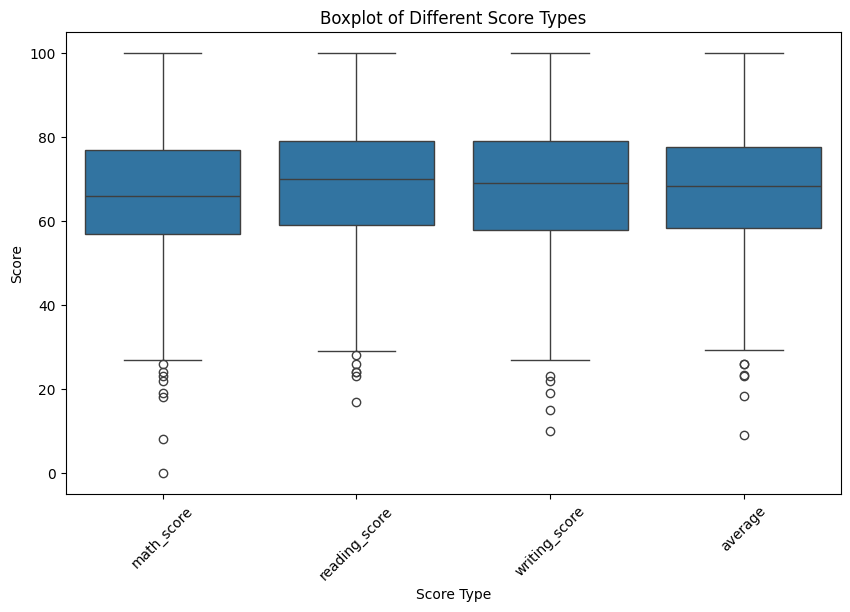

In [55]:
# fix, axs=plt.subplots(5,1,figsize=(10,10))
# plt.subplot(511)
# sns.boxplot(data=df, x='math_score')
# plt.subplot(512)
# sns.boxplot(data=df, x='reading_score')
# plt.subplot(513)
# sns.boxplot(data=df, x='writing_score')
# plt.subplot(514)
# sns.boxplot(data=df, x='average')
# plt.subplot(515)
# sns.boxplot(data=df, x='total score')

# Reshape the DataFrame to have the score types in one column
df_melted = df.melt(value_vars=['math_score', 'reading_score', 'writing_score', 'average'],
                    var_name='Score Type', value_name='Score')

# Create a single boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Score Type', y='Score')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Boxplot of Different Score Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

**Insights**
1. To fill in

In [54]:
df_melted.head(2)

,Score Type,Score
0,math_score,72.0
1,math_score,69.0


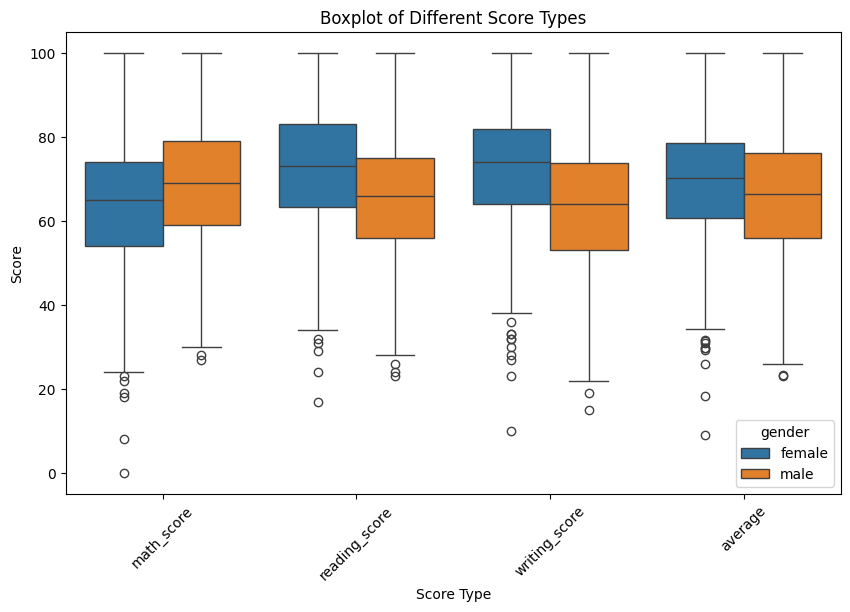

In [56]:
df_melted = df.melt(id_vars='gender',
                    value_vars=['math_score', 'reading_score', 'writing_score', 'average'],
                    var_name='Score Type', value_name='Score')

# Create a single boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Score Type', y='Score', hue='gender')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Boxplot of Different Score Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

**Insights**
1. To fill in

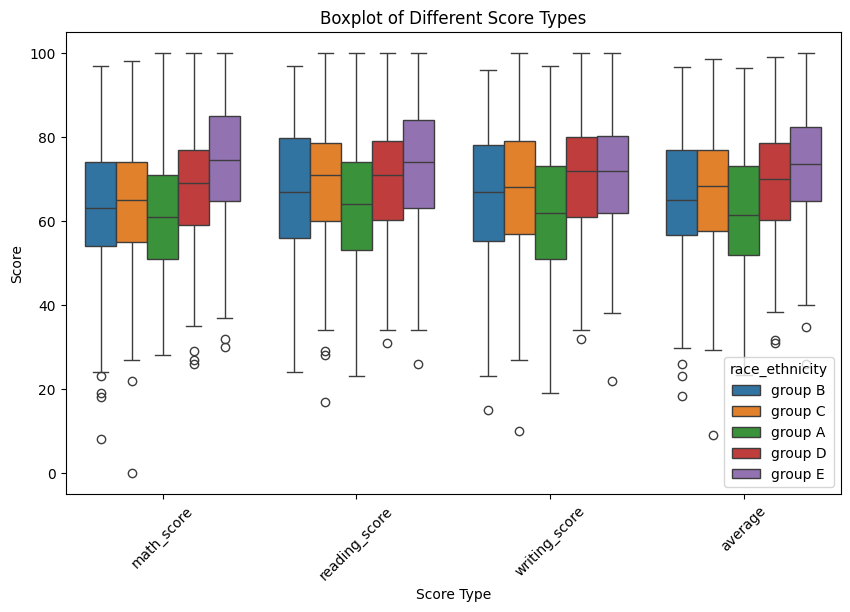

In [59]:
df_melted = df.melt(id_vars='race_ethnicity',
                    value_vars=['math_score', 'reading_score', 'writing_score', 'average'],
                    var_name='Score Type', value_name='Score')

# Create a single boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Score Type', y='Score', hue='race_ethnicity')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Boxplot of Different Score Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

**Insights**
1. To fill in

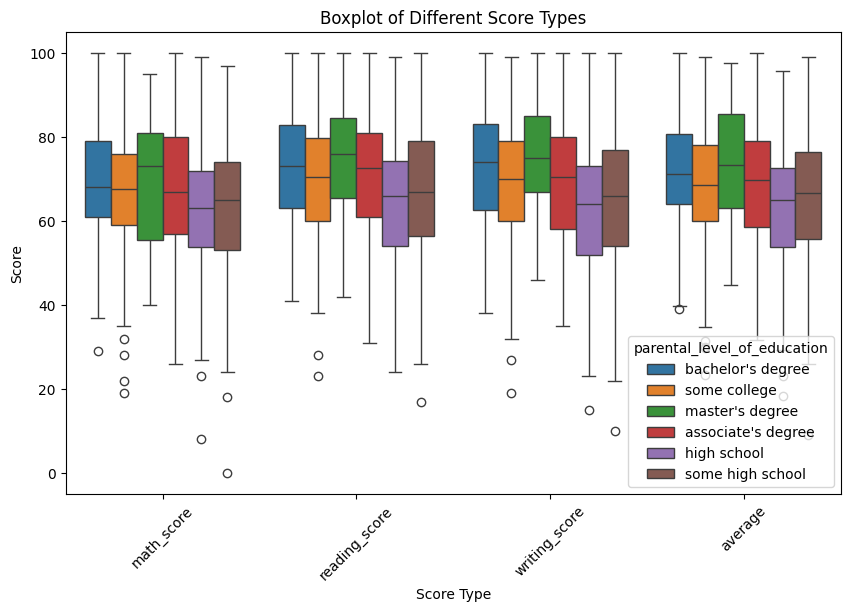

In [60]:
df_melted = df.melt(id_vars='parental_level_of_education',
                    value_vars=['math_score', 'reading_score', 'writing_score', 'average'],
                    var_name='Score Type', value_name='Score')

# Create a single boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Score Type', y='Score', hue='parental_level_of_education')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Boxplot of Different Score Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

**Insights**
1. To fill in

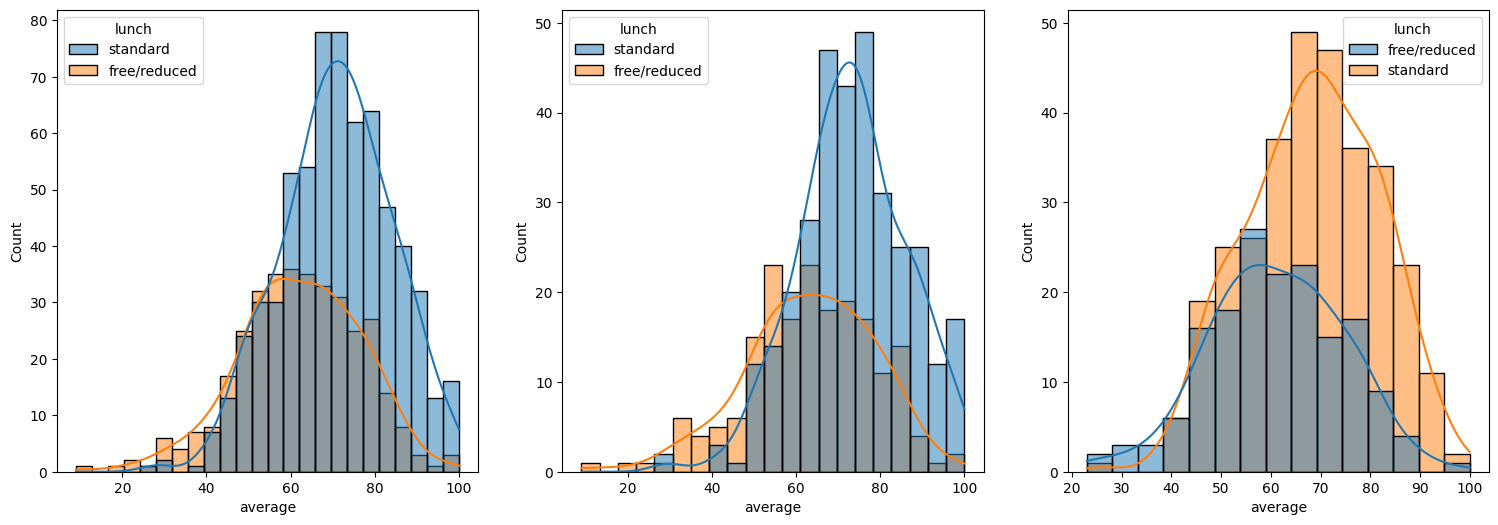

In [62]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

**Insights**
1. To fill in

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

**Insights**
1. To fill in

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

**Insights**
1. To fill in

#### 4.2 - Maximum Score of Students in All Three Subjects

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
1. To fill in

#### 4.3 - Multivariate Analysis using Pyplot

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insights**
1. To fill in

#### 4.4 - Feature-wise Visualization

##### 4.4.1 - Gender Column
- How is the distribution of Gender?
- Does gender have any impact on student's performance?

##### 4.4.1.1 - Univariate Analysis (How is the distribution of Gender?)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**
1. To fill in

##### 4.4.1.2 - Bivariate Analysis (Does gender have any impact on student's performance?)

In [ ]:
gender_group = df.groupby('gender').mean()
gender_group

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**
1. To fill in

##### 4.4.2 - Race/Ethnicity Column
- How is the race/ethnicity distribution?
- Does race/ethnicity have any impact on student's performance?

##### 4.4.2.1 - Univariate Analysis (How is the distribution?)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

**Insights**
1. To fill in

##### 4.4.2.2 - Bivariate Analysis (Does race/ethnicity have any impact on student's performance?)

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**
1. To fill in

##### 4.4.3 - Parental Level of Education Column

##### 4.4.3.1 - Univariate Analysis

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insights**
1. To fill in

##### 4.4.3.1 - Bivariate Analysis

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
1. To fill in

##### 4.4.4 - Lunch Column

##### 4.4.3.1 - Univariate Analysis

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Insights**
1. To fill in

##### 4.4.3.1 - Bivariate Analysis

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

**Insights**
1. To fill in

##### 4.4.5 - Test Preparation Course Column

##### 4.4.3.1 - Bivariate Analysis

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

**Insights**
1. To fill inm

##### 4.4.6 Checking Outliers

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

##### 4.4.7 Multivariate Analysis using Pairplot

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Insights**
1. To fill in

### 5 - Conclusions

**Insights**
1. To fill in